# Energy Markets - Financial Analysis

In [8]:
import yfinance as yf
import pandas as pd
import time

# List of top 20 Renewable Enegy company ticker symbols
companies = [
    'XOM',  # ExxonMobil
    'GEV', #GE Vernova, previously GE Power
    'CVX',  # Chevron
    'NEE',  # NextEra Energy
    'DUK',  # Duke Energy
    'SO',   # Southern Company
    'ENB',  # Enbridge
    'BP',   # BP Plc
    'TTE',  # TotalEnergies
    'EQNR', # Equinor
    'ORSTED.CO', # Orsted A/S
    'VWS.CO',    # Vestas Wind Systems
    'ED',   # Consolidated Edison
    'D',    # Dominion Energy
    'PCG',  # Pacific Gas & Electric
    'PEG',  # Public Service Enterprise Group
    'BEP',  # Brookfield Renewable Partners
    'BE',   # Bloom Energy
    'FSLR', # First Solar
    'RUN',  # Sunrun Inc
    'PLUG'  # Plug Power
]

# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
financial_data = financial_data.sort_values(by='marketCap', ascending=False)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-8-4214bd082831>:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
0,Exxon Mobil Corporation,118.900002,13.35%,Exxon Mobil Corporation,"$528,252,469,248",14.222488,14.273710,1.968120,0.032,N/A,N/A,29004249088,62000,Oil & Gas Integrated,Exxon Mobil Corporation engages in the explora...,0.13351
2,Chevron Corporation,150.539993,11.89%,Chevron Corporation,"$273,192,452,096",14.904949,12.999999,1.729073,0.0433,N/A,N/A,15963750400,45600,Oil & Gas Integrated,"Chevron Corporation, through its subsidiaries,...",0.11894
10,ORSTED A/S,425.100006,25.60%,ORSTED A/S,"$178,639,781,888",N/A,15.622933,3.153865,N/A,N/A,N/A,5476375040,8411,Utilities - Renewable,"Ørsted A/S, together with its subsidiaries, de...",0.25601
3,"NextEra Energy, Inc.",82.870003,35.56%,"NextEra Energy, Inc.","$170,413,867,008",24.590506,22.519022,3.404824,0.0249,N/A,N/A,-16568750080,16800,Utilities - Regulated Electric,"NextEra Energy, Inc., through its subsidiaries...",0.35562
8,TotalEnergies SE,64.699997,12.23%,TotalEnergies SE,"$148,439,908,352",7.327293,7.958179,1.273221,0.0529,N/A,N/A,21783126016,102579,Oil & Gas Integrated,"TotalEnergies SE, a multi-energy company, prod...",0.12226
11,Vestas Wind Systems A/S,128.800003,-5.61%,Vestas Wind Systems A/S,"$129,965,637,632",N/A,429.333300,44.598340,N/A,N/A,N/A,978249984,32298,Specialty Industrial Machinery,"Vestas Wind Systems A/S engages in the design,...",-0.05613
5,Southern Company (The),91.790001,32.37%,Southern Company (The),"$100,470,579,200",21.906921,21.247684,3.096202,0.0314,N/A,N/A,-1471250048,27819,Utilities - Regulated Electric,"The Southern Company, through its subsidiaries...",0.32369
4,Duke Energy Corporation (Holdin,117.059998,24.32%,Duke Energy Corporation (Holdin,"$90,393,960,448",20.04452,18.434645,1.892766,0.0357,N/A,N/A,-2722125056,27037,Utilities - Regulated Electric,"Duke Energy Corporation, together with its sub...",0.24317
6,Enbridge Inc,40.869999,20.47%,Enbridge Inc,"$88,995,651,584",21.855614,18.834100,1.472846,0.0663,N/A,N/A,3993499904,11500,Oil & Gas Midstream,"Enbridge Inc., together with its subsidiaries,...",0.20475
7,BP p.l.c.,31.049999,6.04%,BP p.l.c.,"$82,896,355,328",12.034883,7.220930,7.685644,0.0618,N/A,N/A,15307249664,87800,Oil & Gas Integrated,BP p.l.c. provides carbon products and service...,0.06041


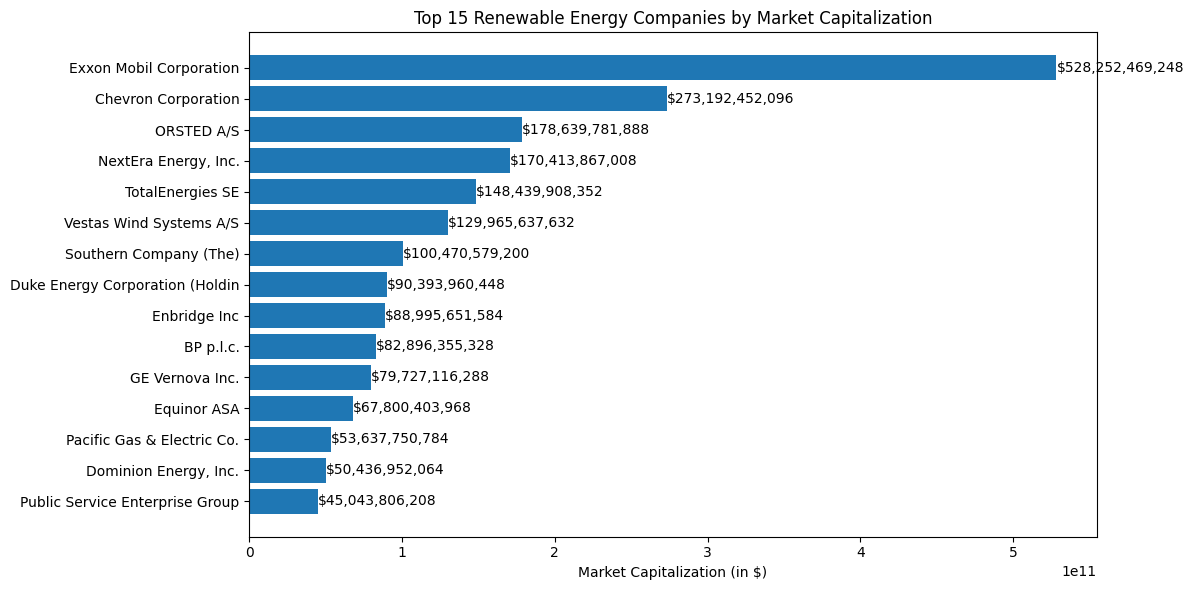

In [15]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 10 companies
top_companies = financial_data.head(15)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 10 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 15 Renewable Energy Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


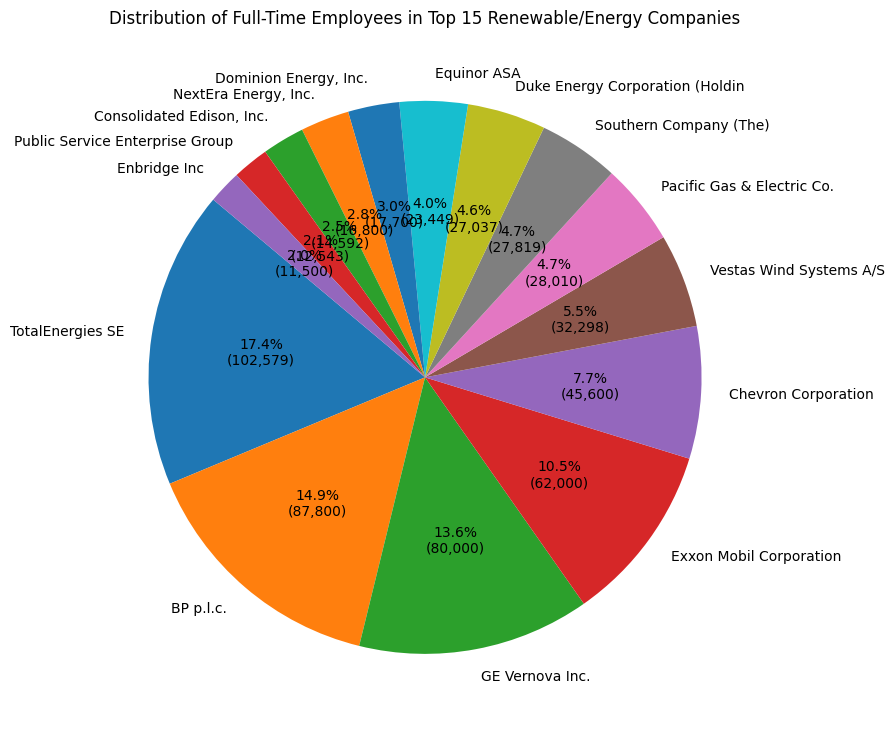

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# Take the top 10 companies with the highest number of employees
top_employers = employee_data.nlargest(15, 'fullTimeEmployees')

# Function to display both percentage and number of employees in each pie chart slice
def pie_label_func(pct, all_values):
    absolute = int(np.round(pct / 100. * np.sum(all_values)))
    return f"{pct:.1f}%\n({absolute:,})"

# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(
    top_employers['fullTimeEmployees'],
    labels=top_employers['Company'],
    autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
    startangle=140
)
plt.title('Distribution of Full-Time Employees in Top 15 Renewable/Energy Companies')
plt.tight_layout()
plt.show()


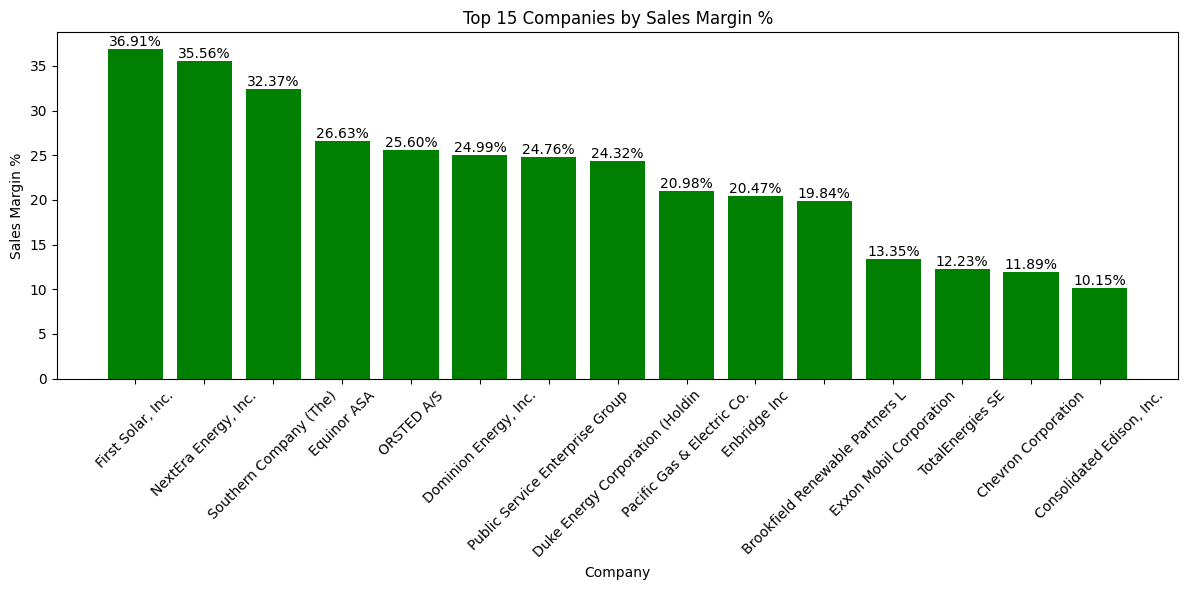

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(15, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 15 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


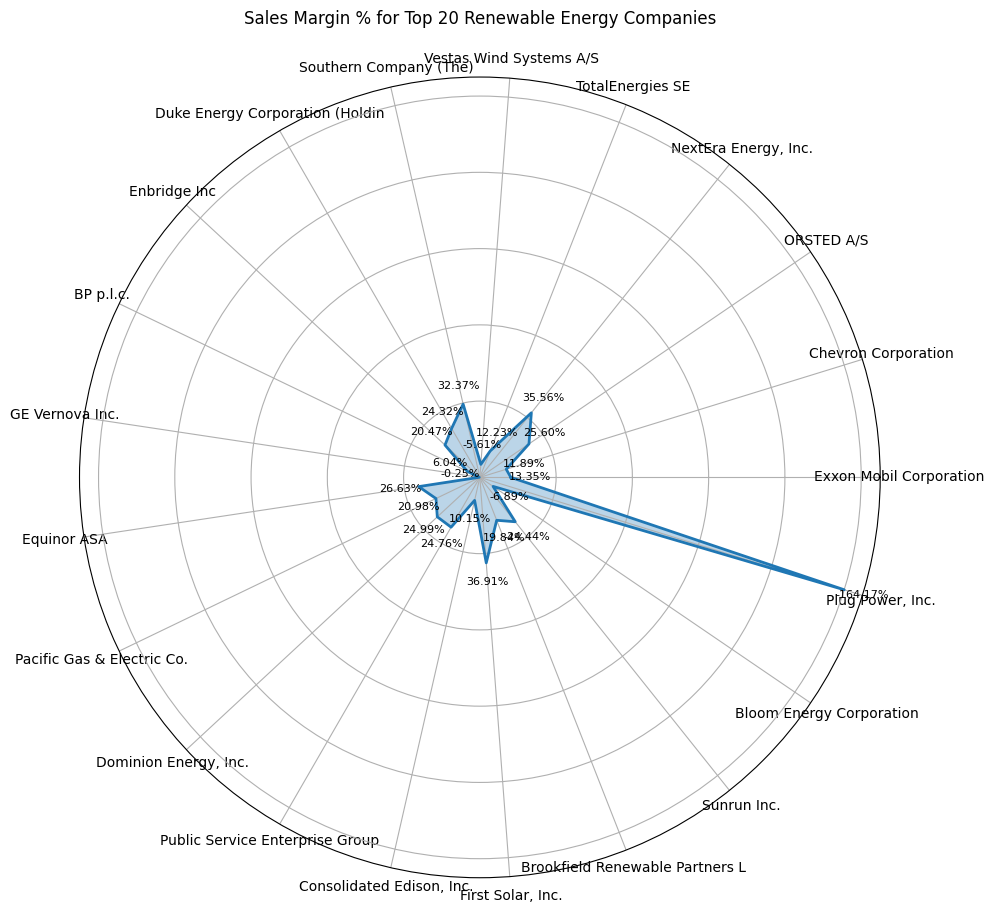

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN, convert to string for replacement, then fill NaN with 0
df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Use the absolute value of sales margin for normalization
df['abs_sales_margin'] = df['sales_margin_%'].abs()
max_sales_margin = df['abs_sales_margin'].max()
df['normalized_sales_margin'] = df['abs_sales_margin'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each original sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % for Top 20 Renewable Energy Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


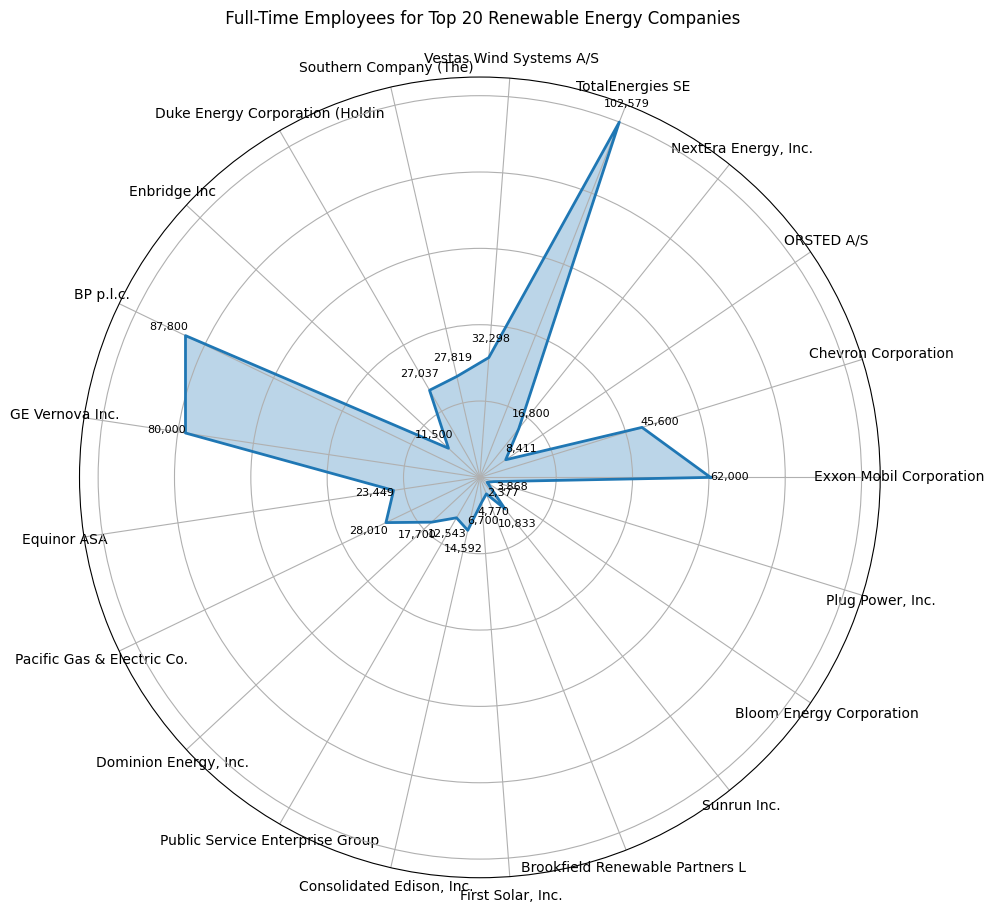

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 20 Renewable Energy Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame similar to your data
# Assuming 'financial_data' is the DataFrame containing the necessary columns

# Step 1: Preprocess data
# Replace 'N/A' with NaN, remove '%' sign, convert to numeric, and fill NaNs with 0
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
financial_data['sales_margin_%'] = pd.to_numeric(financial_data['sales_margin_%'], errors='coerce').fillna(0)

# # Step 2: Plot Violin Plot
# plt.figure(figsize=(12, 8))
# sns.violinplot(x='industry', y='sales_margin_%', data=financial_data, inner='quartile', palette="muted")

# # Customize the plot
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.title("Distribution of Sales Margin % by Industry")
# plt.xlabel("Industry")
# plt.ylabel("Sales Margin %")

# # Show plot
# plt.tight_layout()
# #plt.show()


In [33]:
import pandas as pd
import numpy as np
import plotly.express as px

# Step 1: Diagnostics to understand the structure and contents of the dataset
print("Columns in financial_data:")
print(financial_data.columns)

print("\nPreview of the entire dataset:")
print(financial_data.head())

# Step 2: Check if 'marketCap' exists and contains valid values
if 'marketCap' in financial_data.columns:
    # Preview of non-empty marketCap values
    print("\nNon-empty 'marketCap' values before cleaning:")
    print(financial_data[financial_data['marketCap'].notnull() & (financial_data['marketCap'] != 'N/A') & (financial_data['marketCap'] != '')].head())

    # Step 3: Data Cleaning for 'marketCap'
    # Convert 'marketCap' to numeric, handling 'N/A' values and commas
    financial_data['marketCap'] = financial_data['marketCap'].replace('N/A', np.nan).astype(str).str.replace(',', '', regex=True)
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

    # Step 4: Filter out rows with zero or NaN marketCap values
    financial_data = financial_data[financial_data['marketCap'] > 0]

    # Check if there is still data left after filtering
    if financial_data.empty:
        print("\nFiltered data is empty. There may be an issue with the marketCap values in the dataset.")
    else:
        print("\nFiltered data preview (non-zero Market Cap):")
        print(financial_data[['Company', 'marketCap', 'industry']].head())

        # Step 5: Create Sunburst Chart
        fig = px.sunburst(
            financial_data,
            path=['industry', 'Company'],  # Hierarchical levels for sunburst chart
            values='marketCap',            # Size of each segment
            color='marketCap',             # Color by marketCap
            hover_data={'marketCap': ':.2f'},  # Format hover data
            title="Market Capitalization Distribution by Industry and Company",
            color_continuous_scale='RdBu'  # Choose a color scale
        )

        # Update layout for readability
        fig.update_layout(
            margin=dict(t=50, l=0, r=0, b=0),
            coloraxis_colorbar=dict(
                title="Market Cap",
                ticksuffix="B",   # If values are in billions
            )
        )

        # Show plot
        fig.show()
else:
    print("\n'marketCap' column not found. It may have a different name or format.")


Columns in financial_data:
Index(['Company', 'last_traded_price', 'sales_margin_%', 'shortName',
       'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
       'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees',
       'industry', 'longBusinessSummary', 'operatingMargins',
       'marketCap_billion'],
      dtype='object')

Preview of the entire dataset:
Empty DataFrame
Columns: [Company, last_traded_price, sales_margin_%, shortName, marketCap, trailingPE, forwardPE, priceToBook, dividendYield, revenue, grossProfits, freeCashflow, fullTimeEmployees, industry, longBusinessSummary, operatingMargins, marketCap_billion]
Index: []

Non-empty 'marketCap' values before cleaning:
Empty DataFrame
Columns: [Company, last_traded_price, sales_margin_%, shortName, marketCap, trailingPE, forwardPE, priceToBook, dividendYield, revenue, grossProfits, freeCashflow, fullTimeEmployees, industry, longBusinessSummary, operatingMargins, marketCap_billion]
Index: []

Filter

In [28]:
!pip install seaborn
!pip install plotly